# Primer Examen 15%

## Ejercicio 1
El siguiente url entrega 100 artículos (ver`/work?rows=100` al final del url) de la revista con el ISSN: 1029-8479 correspondiente a "Journal of High Energy Physics" en formato JSON usando el API de CrossRef:

https://api.crossref.org/journals/1029-8479/works?rows=100

La base de datos con los 100 artículos que tambíen se puede cargar en otro DataFrame de Pandas, se encuentra anidada en la celda con fila `'items'` y columna `'messages'` la cual se puede obtener con el método `.loc['items','message']` del DataFrame original.

Obtenga la lista de DOIs para los artículos de Alessandro Strumia en esa base de datos anidada

## Ejercicio 2
2a) Genere un polinomio de numpy con 7 raices aleatorias entre 1 y 10

2b) Encuentre los puntos críticos del polinomio: las raices de la derivada el polinomio.

2c) Con alguna de los métodos para encontrar mínimos compruebe que el punto crítico de menor (mayor) valor corresponde al mínimo (máximo) global del polinomio

2d) Grafique el polinomío inclueyendo los puntos asociados a las raices.

## Solución Ejercicio 1

In [52]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [53]:
import pandas as pd
import random as rd
import numpy as np
import scipy.optimize as optimize
import matplotlib.pyplot as plt



In [3]:
df=pd.read_json('https://api.crossref.org/journals/1029-8479/works?rows=100')
df

,status,message-type,message-version,message
facets,ok,work-list,1.0.0,{}
items,ok,work-list,1.0.0,"[{'indexed': {'date-parts': [[2020, 3, 30]], '..."
items-per-page,ok,work-list,1.0.0,100
query,ok,work-list,1.0.0,"{'start-index': 0, 'search-terms': None}"
total-results,ok,work-list,1.0.0,31567


In [69]:
dff = pd.DataFrame(df.loc['items','message']) 
dff2= pd.DataFrame(dff['author'])
dff2


,author
0,"[{'given': 'Juan José', 'family': 'Manjarín', ..."
1,"[{'given': 'Hiroshige', 'family': 'Kajiura', '..."
2,"[{'given': 'Riccardo', 'family': 'Barbieri', '..."
3,"[{'given': 'Yingcheng', 'family': 'Li', 'seque..."
4,"[{'given': 'Sergei', 'family': 'Gukov', 'seque..."
...,...
95,"[{'given': 'Enrique', 'family': 'Moreno', 'seq..."
96,"[{'given': 'Ian', 'family': 'I.Kogan', 'sequen..."
97,"[{'given': 'Gleb', 'family': 'Arutyunov', 'seq..."
98,"[{'given': 'David Elazzar', 'family': 'Kaplan'..."


## Solución Ejercicio 2

In [55]:
#2-a Creación del polinomio.

pol= np.poly1d([rd.randint(1,10),rd.randint(1,10),rd.randint(1,10),rd.randint(1,10),rd.randint(1,10),rd.randint(1,10),rd.randint(1,10)],r=True)

print (pol)

   7      6       5        4             3             2
1 x - 41 x + 699 x - 6391 x + 3.352e+04 x - 9.907e+04 x + 1.469e+05 x - 7.56e+04


In [56]:
#2-b: Raíces del polinomio.

der = pol.deriv()
raices=der.roots.real #Se toma las partes reales ya que estas raíces tienen ceros computacionales como parte imaginaria

print(raices)

[9.39343334 6.7690534  6.         6.         5.22649167 1.75387874]


In [57]:
#2-c. Verificacióon máximos y mínimos globales.

dic={} #diccionario vacío para ingresar los datos de los valores asociados a las raíces

for i in range(len(raices)):
    dic[pol(raices[i])] = [raices[i]]

l=np.sort(pol(raices)) #Ordena los valores asociados a las raíces de menor a mayor para usar el método optimize en ese punto y verificar

min= optimize.fmin_powell(pol, dic.get(l[0]), disp=False) #Búsqueda del mínimo y máximo al rededor del punto encontrado.
max= optimize.fmin_powell(-pol, dic.get(l[-1]), disp=False)

print('El punto crítico relacionado con el mínimo global {} corresponde al valor de la minimización {}' .format(dic.get(l[0]),min))
print('El punto crítico relacionado con el máximo global {} corresponde al valor de la minimización {}' .format(dic.get(l[-1]),max))

El punto crítico relacionado con el mínimo global [9.393433336728926] corresponde al valor de la minimización [9.39343335]
El punto crítico relacionado con el máximo global [1.753878736145277] corresponde al valor de la minimización [1.75387877]


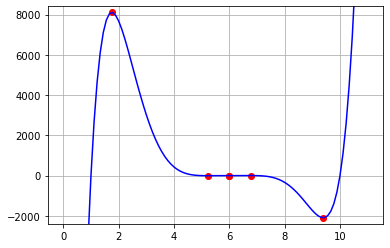

In [59]:
#2-d: Graficación.

x = np.linspace(0,11,100)


plt.plot(raices,pol(raices),'ro')
plt.plot(x,pol(x),'b-')
plt.ylim(l[0]-300,l[-1]+300)
plt.grid()
plt.show()